# Data Processing

In [177]:
import pandas as pd
import datetime as dt
import numpy as np

In [102]:
pd.set_option('display.max_columns',None)
df_sales = pd.read_csv('/Users/anhnguyen/Documents/DataAnalyst/Python_in_DA/Global_Electronics_Retailer/Sales.csv')
df_product = pd.read_csv('/Users/anhnguyen/Documents/DataAnalyst/Python_in_DA/Global_Electronics_Retailer/Products.csv')
df_store = pd.read_csv('/Users/anhnguyen/Documents/DataAnalyst/Python_in_DA/Global_Electronics_Retailer/Stores.csv')

In [104]:
#Join df_sales and df_product by ProductKey
df = pd.merge(df_sales,df_product,on = 'ProductKey')
df = pd.merge(df,df_store,on = 'StoreKey')
df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Country,State,Square Meters,Open Date
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015
1,1896020,1,3/10/2020,NaN,302645,10,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers,Canada,Nunavut,1210.0,4/4/2015
2,1298021,1,7/21/2018,NaN,363584,10,163,8,CAD,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,$527.53,"$1,592.20",201,Televisions,2,TV and Video,Canada,Nunavut,1210.0,4/4/2015
3,1506050,4,2/14/2019,NaN,391900,10,163,4,CAD,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,$527.53,"$1,592.20",201,Televisions,2,TV and Video,Canada,Nunavut,1210.0,4/4/2015
4,1452075,3,12/22/2018,NaN,211746,10,421,2,CAD,Adventure Works Desktop PC3.0 MS300 Silver,Adventure Works,Silver,$215.68,$469.00,303,Desktops,3,Computers,Canada,Nunavut,1210.0,4/4/2015


In [108]:
# Display the shape of the dataset
df.shape

(62884, 22)

In [106]:
# Rename the column to lower
df.columns= df.columns.str.lower()
df.head()

,order number,line item,order date,delivery date,customerkey,storekey,productkey,quantity,currency code,product name,brand,color,unit cost usd,unit price usd,subcategorykey,subcategory,categorykey,category,country,state,square meters,open date
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,4/4/2015
1,1896020,1,3/10/2020,NaN,302645,10,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers,Canada,Nunavut,1210.0,4/4/2015
2,1298021,1,7/21/2018,NaN,363584,10,163,8,CAD,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,$527.53,"$1,592.20",201,Televisions,2,TV and Video,Canada,Nunavut,1210.0,4/4/2015
3,1506050,4,2/14/2019,NaN,391900,10,163,4,CAD,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,$527.53,"$1,592.20",201,Televisions,2,TV and Video,Canada,Nunavut,1210.0,4/4/2015
4,1452075,3,12/22/2018,NaN,211746,10,421,2,CAD,Adventure Works Desktop PC3.0 MS300 Silver,Adventure Works,Silver,$215.68,$469.00,303,Desktops,3,Computers,Canada,Nunavut,1210.0,4/4/2015


In [110]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order number    62884 non-null  int64  
 1   line item       62884 non-null  int64  
 2   order date      62884 non-null  object 
 3   delivery date   13165 non-null  object 
 4   customerkey     62884 non-null  int64  
 5   storekey        62884 non-null  int64  
 6   productkey      62884 non-null  int64  
 7   quantity        62884 non-null  int64  
 8   currency code   62884 non-null  object 
 9   product name    62884 non-null  object 
 10  brand           62884 non-null  object 
 11  color           62884 non-null  object 
 12  unit cost usd   62884 non-null  object 
 13  unit price usd  62884 non-null  object 
 14  subcategorykey  62884 non-null  int64  
 15  subcategory     62884 non-null  object 
 16  categorykey     62884 non-null  int64  
 17  category        62884 non-null 

In [112]:
# Define the null_count() function to count of nulls and the percentage of nulls in the data
def null_count(data):
    null_count = data.isnull().sum().sort_values(ascending = False)
    null_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending = False)
    total = pd.concat([null_count, null_percent], axis = 1, keys = ['null_count', 'null_percent'])
    return total[total['null_count']>0]

In [114]:
null_count(df)

,null_count,null_percent
delivery date,49719,79.064627
square meters,13165,20.935373


In [ ]:
# Remove all columns with missing value > 70%
df.drop(columns='delivery date', inplace=True)

# Fill in all columns with missing values between 1% and 70% of the median
df['square meters'].fillna(value=df['square meters'].median(), inplace=True)

In [126]:
null_count(df)

,null_count,null_percent


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order number    62884 non-null  int64  
 1   line item       62884 non-null  int64  
 2   order date      62884 non-null  object 
 3   customerkey     62884 non-null  int64  
 4   storekey        62884 non-null  int64  
 5   productkey      62884 non-null  int64  
 6   quantity        62884 non-null  int64  
 7   currency code   62884 non-null  object 
 8   product name    62884 non-null  object 
 9   brand           62884 non-null  object 
 10  color           62884 non-null  object 
 11  unit cost usd   62884 non-null  object 
 12  unit price usd  62884 non-null  object 
 13  subcategorykey  62884 non-null  int64  
 14  subcategory     62884 non-null  object 
 15  categorykey     62884 non-null  int64  
 16  category        62884 non-null  object 
 17  country         62884 non-null 

In [150]:
# Change the order_date and open_date column types to datetime64
df[['order date','open date']] = df[['order date','open date']].astype('datetime64[ns]')

# Replace special characters in the unit_price_usd and unit_cost_usd column
df['unit cost usd'] = df['unit cost usd'].str.replace('$','').str.replace(',','')
df['unit price usd'] = df['unit price usd'].str.replace('$','').str.replace(',','')

# Change the unit_price_usd and unit_cost_usd column types to float64
df[['unit price usd','unit cost usd']] = df[['unit price usd','unit cost usd']].astype('float')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order number    62884 non-null  int64         
 1   line item       62884 non-null  int64         
 2   order date      62884 non-null  datetime64[ns]
 3   customerkey     62884 non-null  int64         
 4   storekey        62884 non-null  int64         
 5   productkey      62884 non-null  int64         
 6   quantity        62884 non-null  int64         
 7   currency code   62884 non-null  object        
 8   product name    62884 non-null  object        
 9   brand           62884 non-null  object        
 10  color           62884 non-null  object        
 11  unit cost usd   62884 non-null  float64       
 12  unit price usd  62884 non-null  float64       
 13  subcategorykey  62884 non-null  int64         
 14  subcategory     62884 non-null  object        
 15  ca

In [342]:
df.head(3)

,order number,line item,order date,customerkey,storekey,productkey,quantity,currency code,product name,brand,color,unit cost usd,unit price usd,subcategorykey,subcategory,categorykey,category,country,state,square meters,open date,profit,order year
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,36.73,2016
1,1896020,1,2020-03-10,302645,10,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.0,301,Laptops,3,Computers,Canada,Nunavut,1210.0,2015-04-04,159.80,2020
2,1298021,1,2018-07-21,363584,10,163,8,CAD,"Adventure Works 52"" LCD HDTV X790W White",Adventure Works,White,527.53,1592.2,201,Televisions,2,TV and Video,Canada,Nunavut,1210.0,2015-04-04,8517.36,2018


In [195]:
# Compute profit 
df['profit']=(df['unit price usd']-df['unit cost usd'])*df['quantity']

# Data Visualization

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
# Revenue by each Year

In [252]:
Revenue_Year = df['unit price usd'].groupby(df['order date'].dt.year).sum().reset_index()
Revenue_Year['revenue(M)'] = Revenue_Year['unit price usd']/1000000
Revenue_Year

,order date,unit price usd,revenue(M)
0,2016,2153064.35,2.153064
1,2017,2391361.95,2.391362
2,2018,4060257.26,4.060257
3,2019,5768023.87,5.768024
4,2020,2945299.43,2.945299
5,2021,325347.49,0.325347


[Text(0, 0, '2.15306'),
 Text(0, 0, '2.39136'),
 Text(0, 0, '4.06026'),
 Text(0, 0, '5.76802'),
 Text(0, 0, '2.9453'),
 Text(0, 0, '0.325347')]

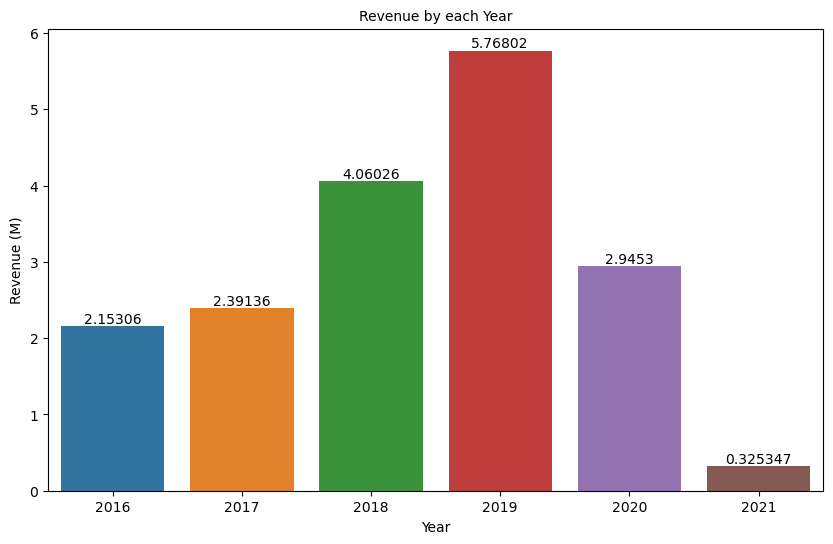

In [258]:
plt.figure(figsize=(10,6))
chart = sns.barplot(Revenue_Year, x = 'order date' , y= 'revenue(M)')

plt.title('Revenue by each Year', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Revenue (M)', fontsize = 10)

chart.bar_label(chart.containers[0])

In [311]:
# Revenue Year by Country

In [288]:
df['order year'] = df['order date'].dt.year
Revenue_Year_by_Country = df.groupby(['order year','country'])['unit price usd'].sum().reset_index()
Revenue_Year_by_Country['country'].unique()

array(['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Netherlands',
       'Online', 'United Kingdom', 'United States'], dtype=object)

In [275]:
def addlabels(xs, ys):
    for x,y  in zip(xs,ys):
        
        label= "{:.0f}".format(y)
        
        plt.annotate(label, #this is the text
                        xy= (x,y),
                        xytext = (x,y-5),
                        ha='center')

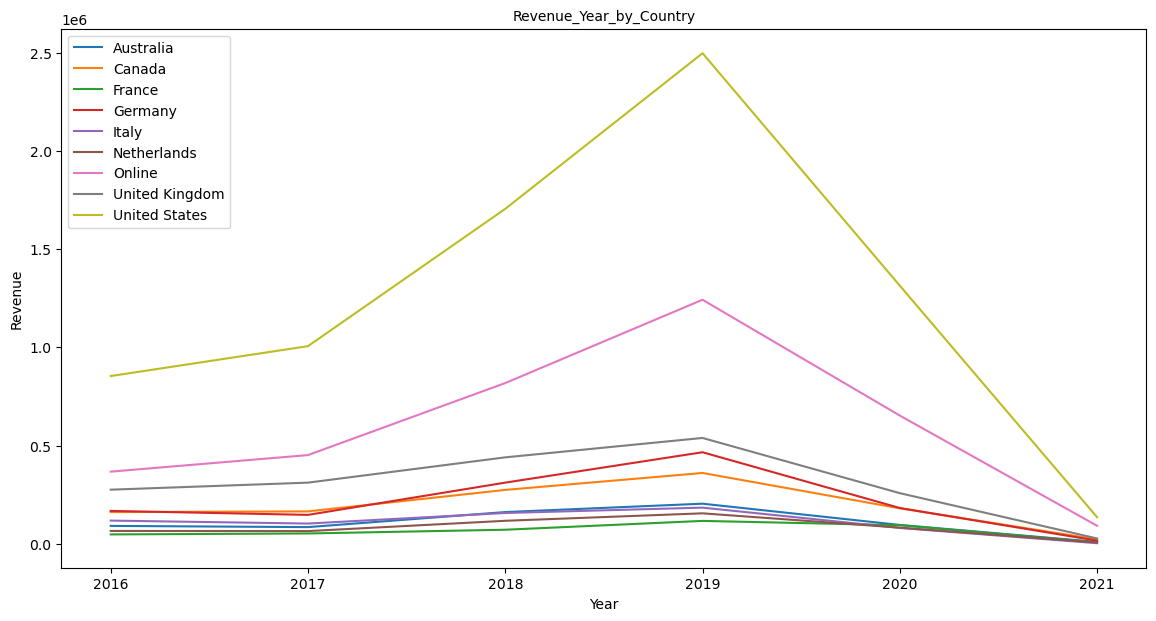

In [309]:
#set size
plt.figure(figsize=(14,7))

#Plot
sns.lineplot(Revenue_Year_by_Country, x="order year", y="unit price usd", hue="country")


#Decorate
plt.title('Revenue_Year_by_Country', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)
plt.legend(loc='upper left') #--> loc is location

In [345]:
# Contribution of Brand 

In [327]:
def pie(data, label,col, title=None, figsize=(12,8),fontsize=14):
    plt.figure(figsize=figsize)
    labels = data[label]
    plt.pie(x = data[col], autopct="%.1f%%", explode=[0.02]*data[label].count(),\
            labels=labels, pctdistance = 0.8)
    plt.title(title, fontsize=fontsize)

In [332]:
df2=df.groupby('brand').size().reset_index(name='count')
df2

,brand,count
0,A. Datum,1834
1,Adventure Works,6382
2,Contoso,15953
3,Fabrikam,3560
4,Litware,1663
5,Northwind Traders,2411
6,Proseware,2995
7,Southridge Video,7887
8,Tailspin Toys,5457
9,The Phone Company,6062


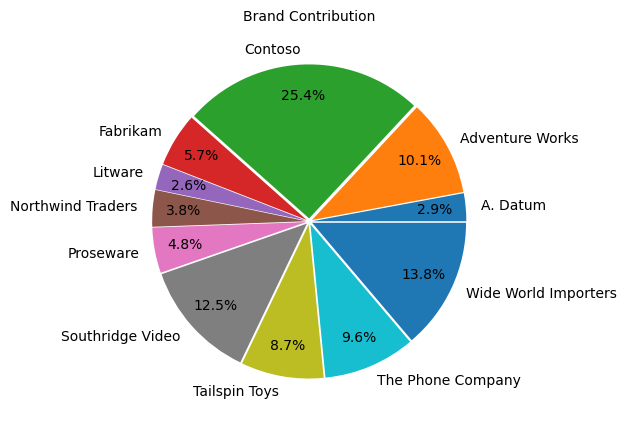

In [339]:
pie(df2,label='brand',col='count',title='Brand Contribution',\
    figsize = (8,5), fontsize=10)

In [349]:
# Profit Distribution by Country

In [352]:
def boxplot(data,x,y, hue=None,orient='v',figsize=(12,8), title=None, fontsize=14): 
    plt.figure(figsize=figsize)
    sns.boxplot (data=data, x=x, y=y, orient=orient, hue=hue, palette="Set2")
    plt.title(title, fontsize=fontsize)

Text(0, 0.5, 'Profit')

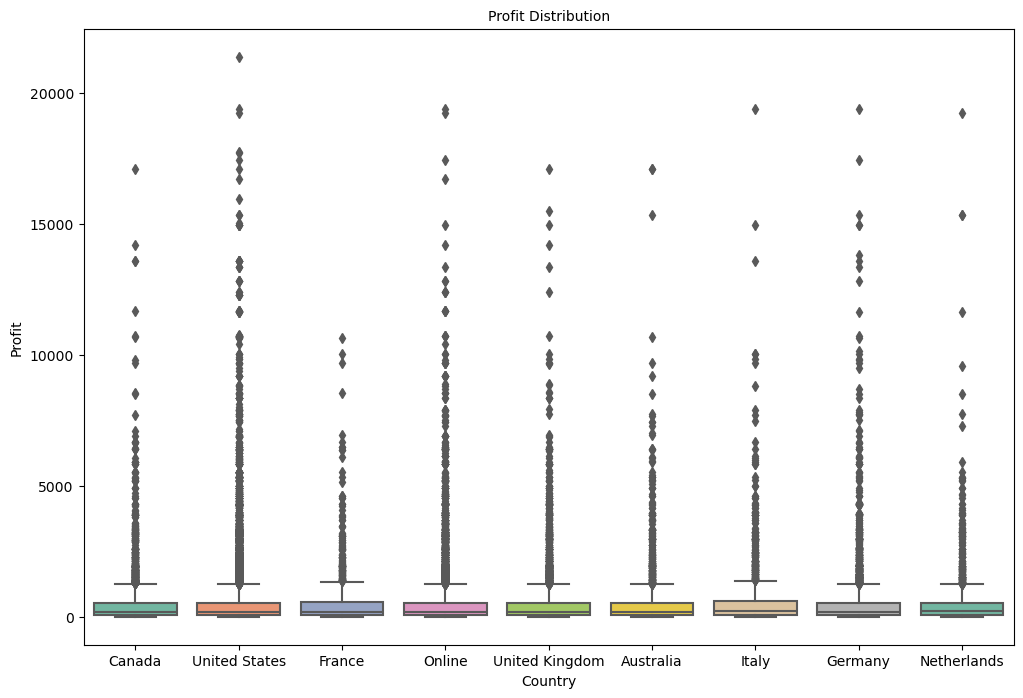

In [357]:
boxplot(df, x='country', y='profit')

plt.title('Profit Distribution', fontsize = 10)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Profit', fontsize = 10)